And(Not(And(a, b, c)), And(And(a, b), And(b, c), And(a, c)))
Load pickle done.
Finished drawing the graph.
0: (not (and (not (and v18 v14 v22)) v22 v18 v26))
1: (and (not (and v18 v14 v22)) v22 v18 v26)
2: (not (and v18 v14 v22))
3: (and v22 v18 v26)
4: (and v18 v14 v22)
5: v22
6: v18
7: v26
8: v14


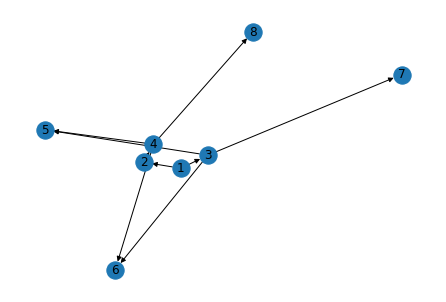

In [4]:
'''
Convert the !s & s' example to graph (visualize it)
'''





import z3
import pickle
import networkx as nx
import os
import matplotlib.pyplot as plt

# applen sys path
import sys
sys.path.append('../code-python_version')
from data_gen_no_enumerate import problem

a = z3.Bool('a')
b = z3.Bool('b')
c = z3.Bool('c')

a_prime = z3.And(a,b)
b_prime = z3.And(b,c)
c_prime = z3.And(a,c)

s = z3.And(a,b,c)
s_prime = z3.And(a_prime,b_prime,c_prime)

graph = z3.And(z3.Not(s),s_prime)
print(graph)

# load pickle
with open('./nusmv.syncarb5^2.B_10.pkl', 'rb') as f:
    cube_before_generalized = pickle.load(f)

print("Load pickle done.")

# use networkx to visulize the graph
G = nx.DiGraph()
# add node from dataframe's first row

G.add_nodes_from(list(cube_before_generalized.node_ref.keys())[1:])
# add edge from syncarb5_2.edges
G.add_edges_from(list(cube_before_generalized.edges)[1:])

nx.draw(G,with_labels=True)

print("Finished drawing the graph.")

#print the node info
for node in cube_before_generalized.node_ref.keys():
    print(f"{node}: {str(cube_before_generalized.node_ref[node])}")

# save networkx graph to pdf (roate 90 degree)
G.name = 'syncarb5^2.B_10'
nx.drawing.nx_pydot.write_dot(G, "../log/figures/syncarb5_2.dot")
os.system("dot -Tpdf ../log/figures/syncarb5_2.dot -o ../log/figures/syncarb5_dot.pdf")

# directly save networkx graph to pdf
plt.savefig("../log/figures/syncarb5.pdf", format="PDF")


